<a href="https://colab.research.google.com/github/NAVI2347R/Navi_80A0B00A40A9AABB19440BDA5DF8BFB3/blob/main/Disaster_Management_%7C_%F0%9F%93%88Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
umeradnaan_prediction_of_disaster_management_in_2024_path = kagglehub.dataset_download('umeradnaan/prediction-of-disaster-management-in-2024')

print('Data source import complete.')


100%|██████████| 293k/293k [00:00<00:00, 52.6MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div align="center" style="background-color: #091057; padding: 20px; border-radius: 10px;">
  <h1 style="color: #A0D683;">Loading Libraries</h1>
</div>

In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'kaggle'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error

<div align="center" style="background-color: #77CDFF; padding: 20px; border-radius: 10px;">
  <h1 style="color: #EC8305;">Data Loading</h1>
</div>

In [4]:
df=pd.read_csv("/content/natural_disasters_2024.csv")

In [5]:
df.sample(10)

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
3176,3177,Earthquake,USA,6.726857,2024-05-12 08:00:00,2281,5.859518e+08
9648,9649,Earthquake,India,2.892824,2025-02-06 00:00:00,3864,8.827973e+08
9236,9237,Hurricane,Japan,9.164862,2025-01-19 20:00:00,8045,7.254042e+08
1197,1198,Hurricane,Indonesia,9.823599,2024-02-19 21:00:00,2677,8.793213e+08
470,471,Hurricane,Indonesia,8.467086,2024-01-20 14:00:00,6389,8.399474e+08
9737,9738,Wildfire,Indonesia,5.065478,2025-02-09 17:00:00,9362,8.695820e+08
5341,5342,Flood,India,5.619383,2024-08-10 13:00:00,3414,7.566742e+08
2378,2379,Wildfire,India,1.110913,2024-04-09 02:00:00,7045,7.213122e+08
1671,1672,Tornado,Japan,6.023133,2024-03-10 15:00:00,2732,2.754342e+08
2036,2037,Earthquake,USA,3.782056,2024-03-25 20:00:00,2784,3.504745e+08


In [6]:
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.isnull().sum()

,0
Disaster_ID,0
Disaster_Type,0
Location,0
Magnitude,0
Date,0
Fatalities,0
Economic_Loss($),0


In [9]:
df.sample(10)

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
8600,8601,Earthquake,Indonesia,2.567968,2024-12-24 08:00:00,1352,9.360995e+08
9898,9899,Hurricane,Japan,2.537053,2025-02-16 10:00:00,1375,8.739298e+08
9078,9079,Flood,Japan,5.246776,2025-01-13 06:00:00,8926,5.172653e+08
3444,3445,Tornado,China,2.763269,2024-05-23 12:00:00,8598,5.081937e+08
5280,5281,Tornado,India,6.846181,2024-08-08 00:00:00,4497,2.671467e+08
7420,7421,Wildfire,India,9.788229,2024-11-05 04:00:00,9120,2.574380e+07
9323,9324,Hurricane,USA,5.679600,2025-01-23 11:00:00,294,9.834648e+08
1062,1063,Hurricane,USA,2.387973,2024-02-14 06:00:00,6389,1.641713e+08
7586,7587,Hurricane,Brazil,3.524613,2024-11-12 02:00:00,8613,7.912885e+08
2234,2235,Flood,USA,2.843908,2024-04-03 02:00:00,3196,6.860526e+08


<div align="center" style="background-color: #FFE3E3; padding: 20px; border-radius: 10px;">
  <h1 style="color: #091057;">Data Preprocessing</h1>

</div>

In [10]:
# Checking unique values for each column
df.nunique()

,0
Disaster_ID,10000
Disaster_Type,5
Location,6
Magnitude,10000
Date,10000
Fatalities,6314
Economic_Loss($),10000


In [11]:
df['Disaster_Type'].unique()

array(['Wildfire', 'Hurricane', 'Tornado', 'Flood', 'Earthquake'],
      dtype=object)

In [12]:
df['Location'].unique()

array(['Brazil', 'Indonesia', 'China', 'India', 'USA', 'Japan'],
      dtype=object)

We can use dummies or Mapping  

In [13]:
# Mapping 'Disaster_Type' and 'Location' to integer values
disaster_type_mapping = {'Flood': 1, 'Tornado': 2, 'Earthquake': 3,'Wildfire':4, 'Hurricane':5}
location_mapping = {'USA': 1, 'Brazil': 2, 'Indonesia': 3, 'Japan': 4, 'India': 5, 'China':6}

In [14]:
df_mapped = df

In [15]:

df_mapped['Disaster_Type_Mapped'] = df_mapped['Disaster_Type'].map(disaster_type_mapping)
df_mapped['Location_Mapped'] = df_mapped['Location'].map(location_mapping)

# Dropping original categorical columns (optional)
df_mapped = df_mapped.drop(['Disaster_Type', 'Location'], axis=1)

In [16]:
df_mapped.sample(10)

,Disaster_ID,Magnitude,Date,Fatalities,Economic_Loss($),Disaster_Type_Mapped,Location_Mapped
9133,9134,3.161992,2025-01-15 13:00:00,780,8.855572e+08,4,1
9392,9393,7.757061,2025-01-26 08:00:00,6777,1.755188e+08,1,2
6387,6388,3.364663,2024-09-23 03:00:00,5935,6.759339e+08,3,5
4391,4392,6.842879,2024-07-01 23:00:00,6815,2.404974e+08,3,1
232,233,7.459674,2024-01-10 16:00:00,5776,9.366906e+08,3,2
49,50,7.816877,2024-01-03 01:00:00,4279,1.863327e+08,2,5
6038,6039,1.418212,2024-09-08 14:00:00,1276,7.237388e+08,2,4
581,582,9.512058,2024-01-25 05:00:00,9198,6.764987e+08,2,3
1383,1384,5.787630,2024-02-27 15:00:00,9208,5.693091e+08,4,2
7392,7393,8.719345,2024-11-04 00:00:00,4928,6.607337e+08,2,4


<div align="center" style="background-color: #72BF78; padding: 20px; border-radius: 10px;">
  <h1 style="color: #433878;">Exploratory Data Analysis</h1>

</div>

#### 1. Distribution of Magnitude

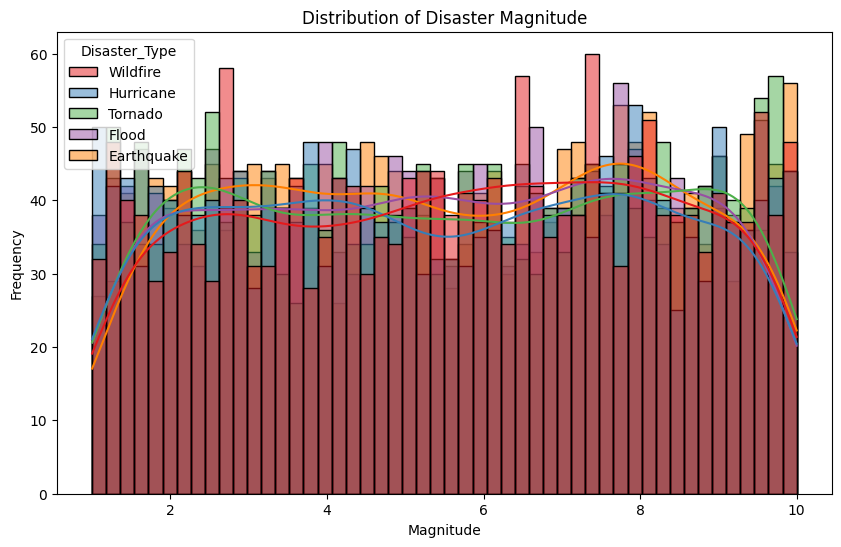

In [17]:

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Magnitude', kde=True, bins=50, hue='Disaster_Type', palette="Set1")
plt.title('Distribution of Disaster Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

#### 2. Count of Disaster Types

<ipython-input-18-78953b75e5e9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




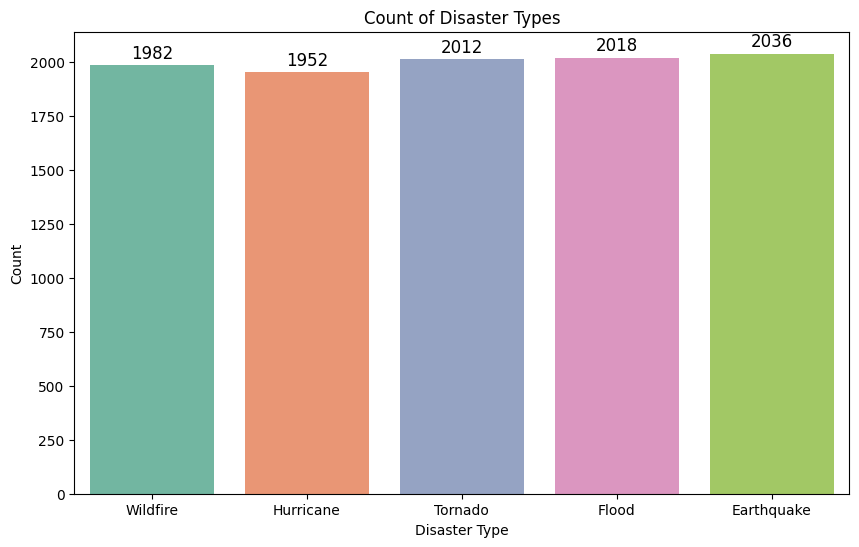

In [18]:

plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Disaster_Type', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),textcoords='offset points')
plt.title('Count of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.show()

#### 3. Boxplot of Fatalities by Disaster Type

<ipython-input-19-5fbf8cfd0b5e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




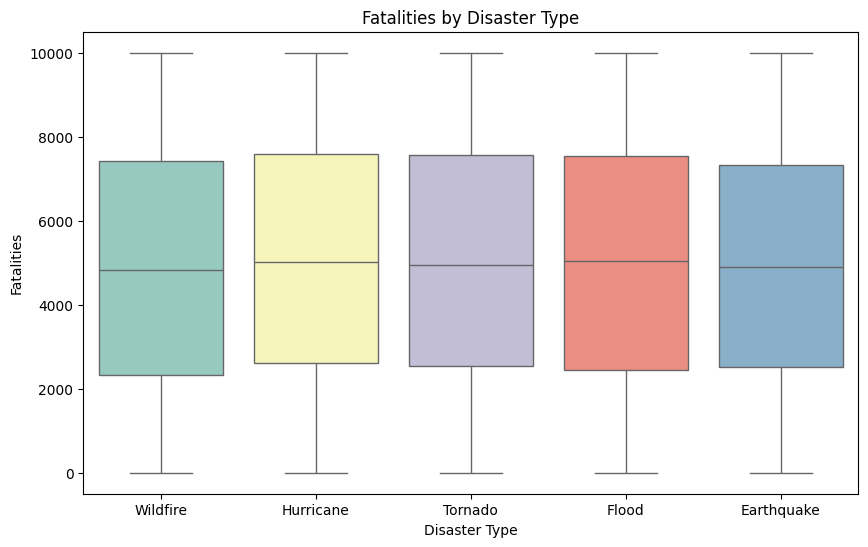

In [19]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Disaster_Type', y='Fatalities', data=df, palette='Set3')
plt.title('Fatalities by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Fatalities')
plt.show()

This box plot shows the distribution of fatalities for different disaster types (Wildfire, Hurricane, Tornado, Flood, and Earthquake). The median fatalities for all disaster types are similar, around 5000. The interquartile range (IQR) is large, indicating significant variation within each disaster type. Whiskers show the range of fatalities, with no visible outliers. Overall, fatalities vary widely for each disaster type, despite having a similar median.

#### 4. Heatmap of Correlations


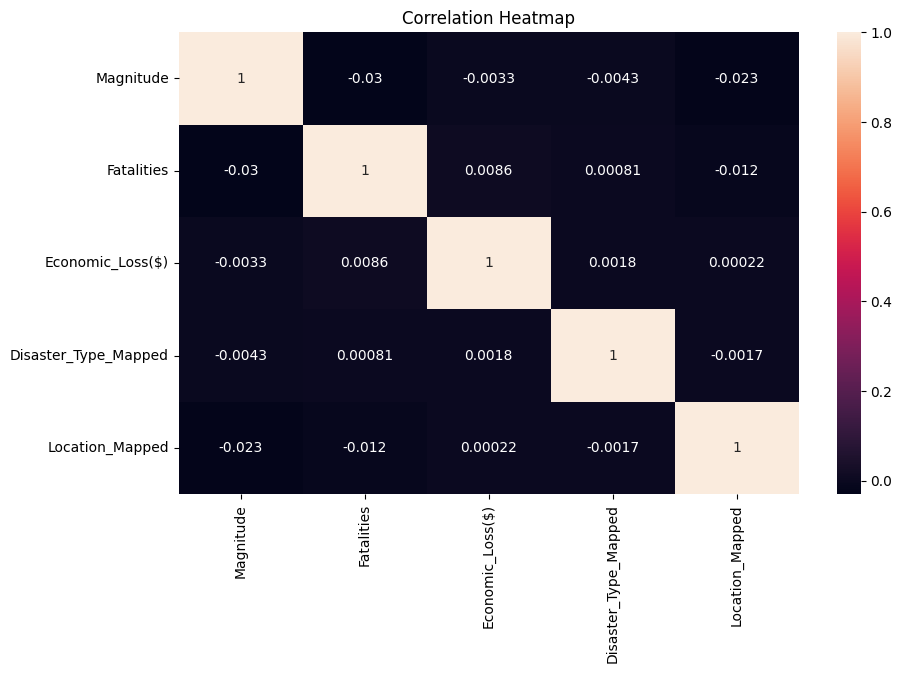

In [20]:
plt.figure(figsize=(10, 6))
df_mapped=df_mapped.drop(['Disaster_ID', 'Date'], axis=1)
corr = df_mapped.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### 5.Fatalities Vs Economic_Loss($)

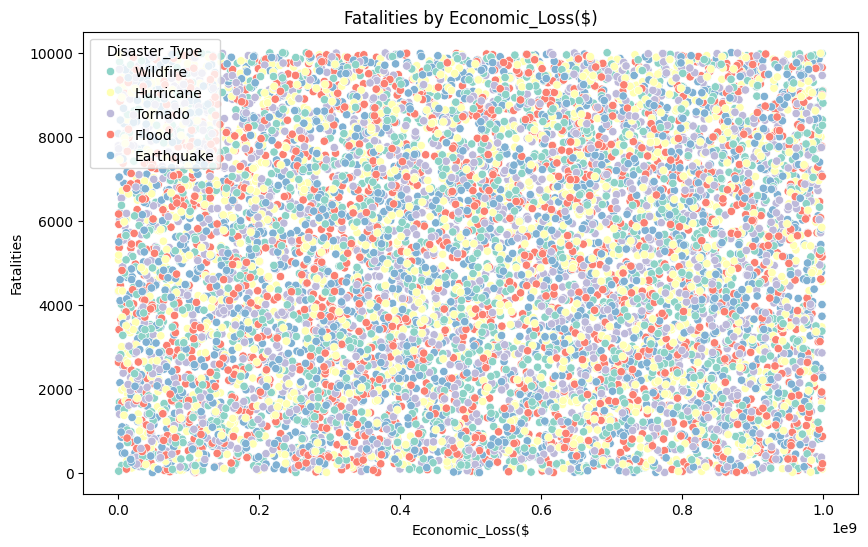

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economic_Loss($)', y='Fatalities', data=df, palette='Set3',hue='Disaster_Type')
plt.title('Fatalities by Economic_Loss($)')
plt.xlabel('Economic_Loss($')
plt.ylabel('Fatalities')
plt.show()

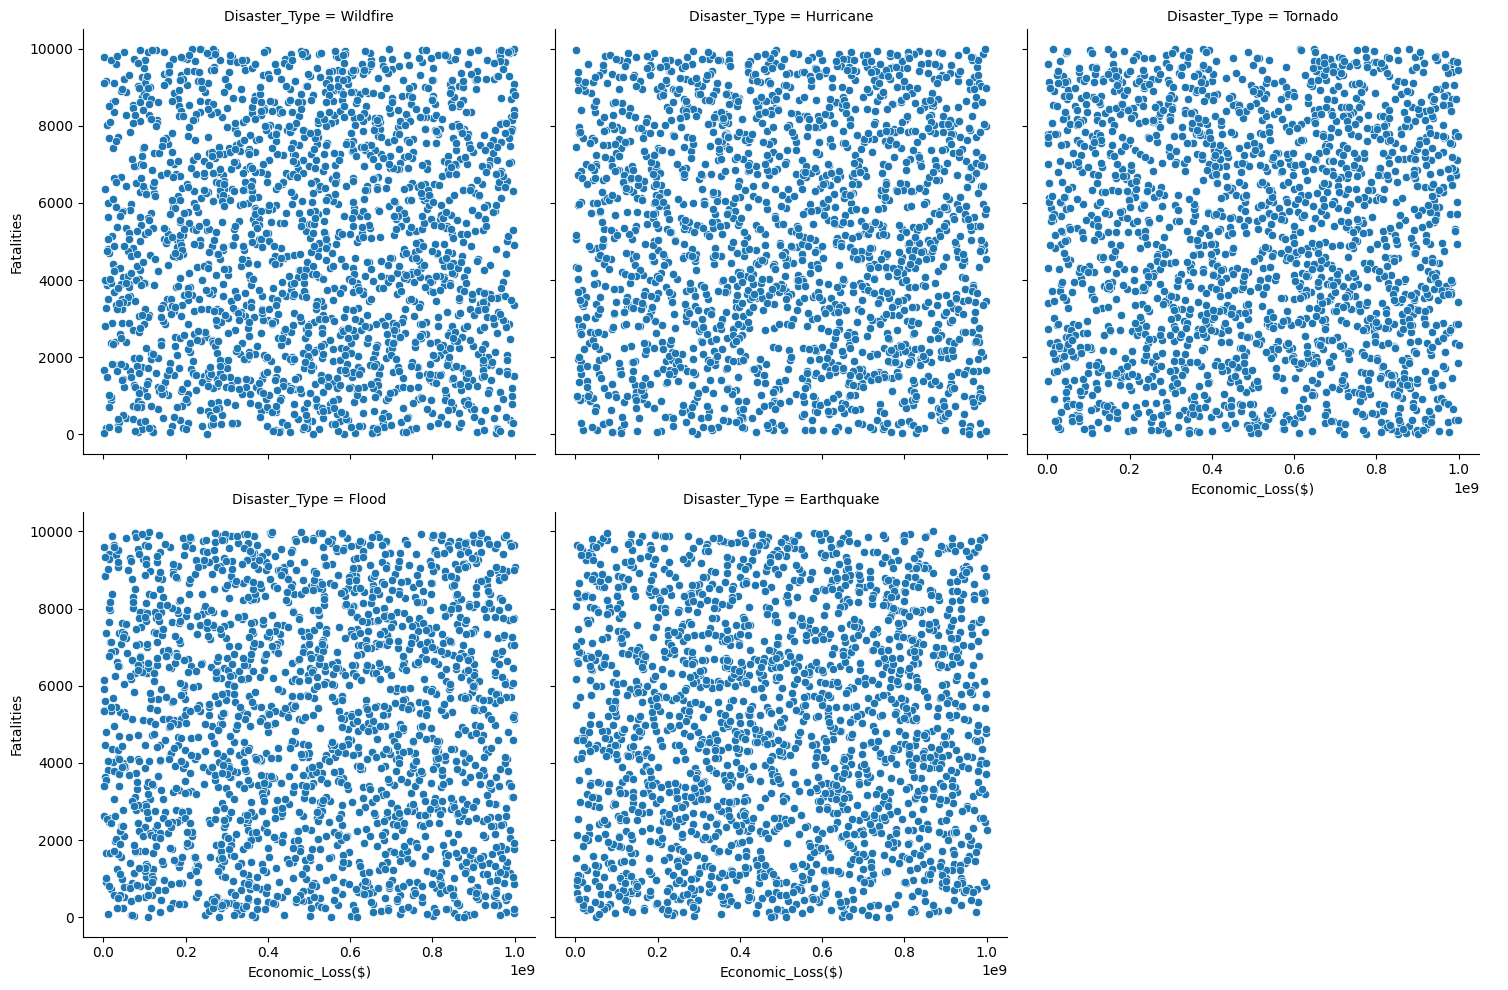

In [22]:
g = sns.FacetGrid(df, col='Disaster_Type', height=5, col_wrap=3)
g.map(sns.scatterplot, 'Economic_Loss($)', 'Fatalities')
g.add_legend()
plt.show()


#### 6.Disaster_Type Vs Magnitude by Location

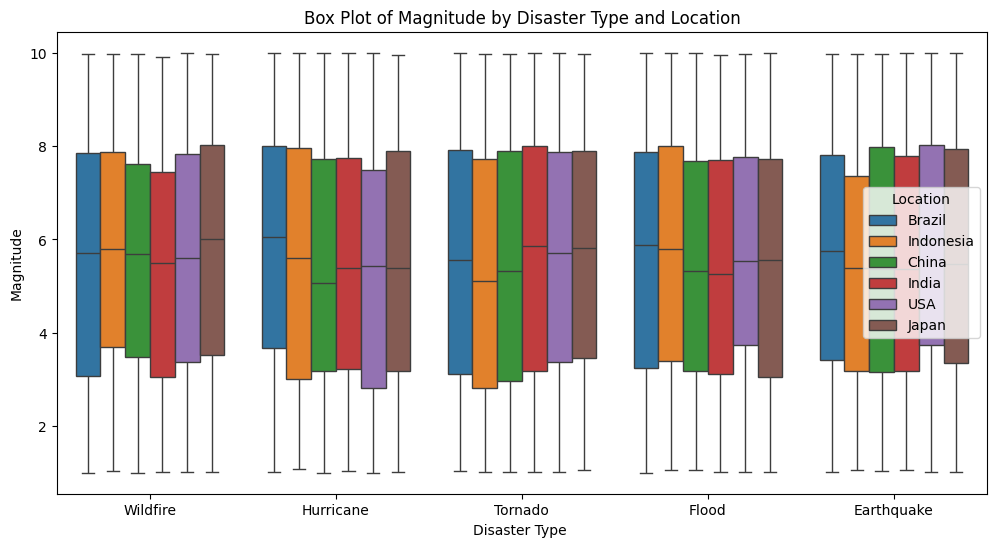

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disaster_Type', y='Magnitude', hue='Location', data=df)
plt.title('Box Plot of Magnitude by Disaster Type and Location')
plt.xlabel('Disaster Type ')
plt.ylabel('Magnitude')
plt.legend(title='Location')
plt.show()

<div align="center" style="background-color: #C4E1F6; padding: 20px; border-radius: 10px;">
  <h1 style="color: blue;">Thank You 🙇‍♂️ for Visiting My Notebook!</h1>

  <p style="font-size: 18px; color: black;">
    If you found this content valuable, please consider giving it a upvote <span style="color: blue;">👍</span>.
    <br>Your support is greatly appreciated and motivates me to continue developing more valuable and informative notebooks
  </p>
</div>
